In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as cx
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style
import numpy as np

In [2]:
basemap_station_file = './SHP/深圳/深圳_station.shp'

In [3]:
basemap_station = gpd.read_file(basemap_station_file, encoding = "utf-8")

In [4]:
basemap_station.head()

line_name station_na         lng        lat               lng84  \
0  地铁1号线(罗宝线)(罗湖--机场东)         罗湖  114.118666  22.532083  114.11356724559275   
1  地铁1号线(罗宝线)(罗湖--机场东)         国贸  114.118826  22.539671   114.1137270106456   
2  地铁1号线(罗宝线)(罗湖--机场东)         老街  114.116241  22.544301  114.11113765809317   
3  地铁1号线(罗宝线)(罗湖--机场东)        大剧院  114.107811    22.5418  114.10269652807666   
4  地铁1号线(罗宝线)(罗湖--机场东)        科学馆  114.095173  22.540618  114.09004758727023   

                lat84                    geometry  
0  22.534773743036723  POINT (114.11357 22.53477)  
1  22.542361431770114  POINT (114.11373 22.54236)  
2   22.54698906170143  POINT (114.11114 22.54699)  
3    22.5444833134091  POINT (114.10270 22.54448)  
4   22.54329955667086  POINT (114.09005 22.54330)

## 首先尝试只用经纬度进行Kmeans聚类

In [5]:
# 提取经纬度信息作为聚类数据
data = basemap_station[['lng', 'lat']].values
# 将data转换为float类型
data = data.astype(np.float)

C:\Users\76608\AppData\Local\Temp\ipykernel_3396\1609017365.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data.astype(np.float)


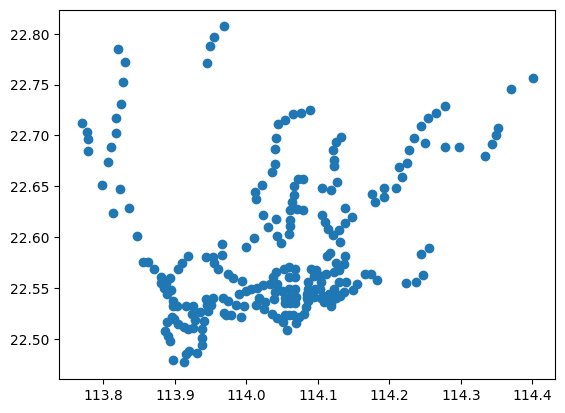

In [6]:
# 根据经纬度画原图
plt.scatter(data[:, 0], data[:, 1])

In [7]:
print(basemap_station['station_na'].unique())

['罗湖' '国贸' '老街' '大剧院' '科学馆' '华强路' '岗厦' '会展中心' '购物公园' '香蜜湖' '车公庙' '竹子林'
 '侨城东' '华侨城' '世界之窗' '白石洲' '高新园' '深大' '桃园' '大新' '鲤鱼门' '前海湾' '新安' '宝安中心'
 '宝体' '坪洲' '西乡' '固戍' '后瑞' '机场东' '盐田路' '深外高中' '盐田港西' '海山' '沙头角' '梧桐山南' '莲塘'
 '仙湖路' '莲塘口岸' '新秀' '黄贝岭' '湖贝' '燕南' '华强北' '岗厦北' '市民中心' '福田' '莲花西' '景田'
 '香梅北' '香蜜' '侨香' '安托山' '深康' '侨城北' '红树湾' '科苑' '后海' '登良' '海月' '湾厦' '东角头'
 '水湾' '海上世界' '蛇口港' '赤湾' '福保' '益田' '石厦' '少年宫' '莲花村' '华新' '通新岭' '红岭' '晒布'
 '翠竹' '田贝' '水贝' '草埔' '布吉' '木棉湾' '大芬' '丹竹头' '六约' '塘坑' '横岗' '永湖' '荷坳' '大运'
 '爱联' '吉祥' '龙城广场' '南联' '双龙' '福田口岸' '福民' '莲花北' '上梅林' '民乐' '白石龙' '深圳北站' '红山'
 '上塘' '龙胜' '龙华' '清湖' '清湖北' '竹村' '茜坑' '长湖' '观澜' '松元厦' '观澜湖' '牛湖' '荔湾'
 '铁路公园' '妈湾' '前湾公园' '前湾' '桂湾' '临海' '宝华' '翻身' '灵芝' '洪浪北' '兴东' '留仙洞' '西丽'
 '大学城' '塘朗' '长岭陂' '民治' '五和' '坂田' '杨美' '上水径' '下水径' '长龙' '百鸽笼' '布心' '太安'
 '怡景' '深理工' '中大' '圳美' '光明' '洪湖' '笋岗' '红岭北' '八卦岭' '黄木岗' '华强南' '赤尾' '福邻'
 '皇岗口岸' '皇岗村' '沙尾' '上沙' '农林' '深云' '桃源村' '龙井' '珠光' '茶光' '西丽湖' '梦海' '怡海'
 '荔林' '南油西' '南油' '南山书城' '深大南' '粤海门' '高新南' '红树湾南' '深湾' '深圳湾公园' '下沙' '

In [8]:
# 计算station_na有多少个不同的值
length=len(basemap_station['station_na'].unique())
print(length)

239


In [9]:
# 利用kmeans算法进行聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)

e:\test\envs\DIP\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 4 4 4 4 4 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 3 3 3 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 3 3 3 3 3 3 3 3 3 0 0 0 2
 1 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3]


## 得到经纬度聚类结果

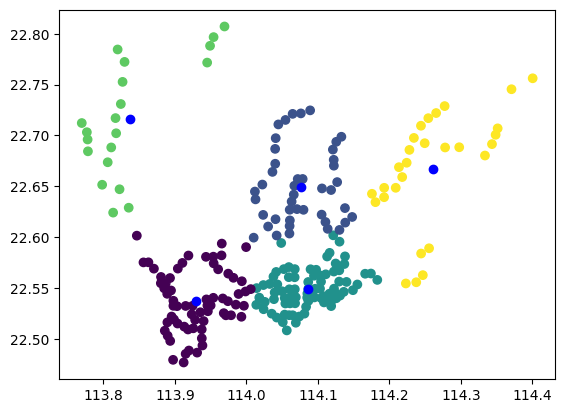

In [11]:
# 画出聚类结果
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='blue')

In [12]:
# 读取地铁流量数据
iopath='metrood201709/20170904.csv'
subway_io = pd.read_csv(iopath, encoding = "utf-8")

In [13]:
subway_io.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672497 entries, 0 to 1672496
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   card_id      1672497 non-null  int64 
 1   time_in      1672497 non-null  object
 2   time_out     1672497 non-null  object
 3   line_in      1672497 non-null  object
 4   line_out     1672497 non-null  object
 5   station_in   1672497 non-null  object
 6   station_out  1672497 non-null  object
 7   device_in    1672497 non-null  int64 
 8   device_out   1672497 non-null  int64 
 9   travel_time  1672497 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 127.6+ MB


In [14]:
subway_io.head()

card_id              time_in             time_out line_in line_out  \
0  880021460  2017-09-04 04:33:54  2017-09-04 04:46:11   地铁一号线    地铁九号线   
1  880021460  2017-09-04 07:20:49  2017-09-04 07:38:01   地铁一号线    地铁九号线   
2  881102492  2017-09-04 04:31:57  2017-09-04 04:42:53   地铁一号线    地铁九号线   
3  881102492  2017-09-04 08:21:29  2017-09-04 09:01:23  地铁十一号线    地铁九号线   
4  880021403  2017-09-04 04:45:25  2017-09-04 04:56:32   地铁三号线    地铁三号线   

  station_in station_out  device_in  device_out  travel_time  
0       None         人民南  267030107   267030103          737  
1       None         人民南  267030121   267030103         1032  
2       None          梅村  267020124   267020101          656  
3       None          梅村  267020124   267020101         2394  
4       None          华新  261009157   261009106          667

In [15]:
# 统计station_in和station_out的值
station_in = subway_io['station_in'].unique()
station_out = subway_io['station_out'].unique()

In [16]:
print(station_in)

['None' '荷坳' '沙尾' '后海站' '西丽' '龙华' '坪洲' '永湖' '横岗' '宝安中心' '翻身' '布吉' '大芬'
 '益田' '塘坑' '罗湖站' '南联' '晒布' '水贝' '东角头' '怡景' '上梅林' '华强路站' '松岗' '鲤鱼门' '红树湾'
 '百鸽笼' '深圳北站' '五和' '华强北' '吉祥' '洪浪北' '长龙' '竹子林站' '白石龙' '高新园' '车公庙站' '布心'
 '下水径' '深圳北' '黄贝岭' '民治' '坂田' '灵芝' '留仙洞' '杨美' '长岭陂' '香梅' '华新' '红树湾南' '后亭'
 '大新' '后瑞' '国贸站' '燕南' '太安' '上水径' '大学城' '木棉湾' '岗厦站' '岗厦北' '翠竹' '双龙' '爱联'
 '白石洲' '宝华' '大运' '红山' '临海' '深康' '福田口岸' '科学馆站' '世界之窗站' '碧海湾站' '购物公园' '兴东'
 '机场东' '华强南' '机场站' '南山站' '老街' '红岭北' '黄木岗' '前海湾站' '民乐' '碧头' '塘朗' '下梅林' '海月'
 '登良' '皇岗村' '赤尾' '前海湾' '园岭' '丹竹头' '桃园' '侨城北' '莲花村' '后海' '景田' '龙城广场' '塘尾站'
 '田贝' '新安' '上沙' '通新岭' '蛇口港' '福民' '草埔' '华侨城站' '福田' '莲花西' '宝体' '深圳大学' '梅景'
 '香蜜湖站' '红岭' '侨香' '新秀站' '西乡' '大剧院站' '梅村' '莲花北' '清湖' '会展中心站' '上塘' '大剧院'
 '珠光' '石厦' '西丽湖' '香梅北' '泥岗' '香蜜' '侨城东站' '购物公园站' '皇岗口岸' '六约' '向西村' '下沙'
 '固戍' '赤湾' '桥头站' '八卦岭' '宝安站' '茶光' '沙井' '科苑' '笋岗' '马鞍山' '湾厦' '湖贝' '文锦' '水湾'
 '少年宫' '深云' '桃源村' '机场北站' '农林' '福永站' '龙井' '红岭南' '银湖' '洪湖' '龙胜' '人民南' '市民中心'
 '孖岭' '鹿丹村' '海上世界' '深圳湾公园' '安托山' '深湾站']


In [17]:
print(len(station_in))

172


In [18]:
# 统计station_in和station_out的值
station_in = subway_io['station_in'].value_counts()
station_out = subway_io['station_out'].value_counts()

In [19]:
print(station_in)
print(station_out)

None    408811
五和       33510
布吉       32411
深圳北      27847
民治       27326
         ...  
鹿丹村        297
安托山        253
前海湾站       158
深湾站        102
机场北站        61
Name: station_in, Length: 172, dtype: int64
None     240296
老街        33103
会展中心站     31439
福田        27073
上梅林       24998
          ...  
前海湾         904
临海          384
前海湾站        378
深湾站         350
机场北站        140
Name: station_out, Length: 172, dtype: int64


In [20]:
# 将station_in和station_out合并
sum=station_in+station_out
station_io = pd.concat([station_in, station_out, sum], axis=1)
station_io.columns = ['station_in', 'station_out', 'sum']
station_io.head()

station_in  station_out     sum
None      408811       240296  649107
五和         33510        21699   55209
布吉         32411        18857   51268
深圳北        27847        22587   50434
民治         27326        15610   42936

In [21]:
# 剔除station_io中的第一行
station_io = station_io.iloc[1:]
station_io.head()

station_in  station_out    sum
五和        33510        21699  55209
布吉        32411        18857  51268
深圳北       27847        22587  50434
民治        27326        15610  42936
丹竹头       25462        10017  35479

## 尝试利用站点的进站出站数据进行Kmeans聚类

In [22]:
# 根据station_io的值进行kmeans聚类
dataio = station_io.values
dataio = dataio.astype(np.float)
kmeansio = KMeans(n_clusters=10, random_state=0).fit(dataio)
print(kmeansio.labels_)

C:\Users\76608\AppData\Local\Temp\ipykernel_3396\3056682459.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataio = dataio.astype(np.float)
e:\test\envs\DIP\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[7 7 7 7 2 2 7 2 2 2 2 2 2 2 2 4 2 4 2 4 2 4 4 1 2 6 4 4 4 6 4 4 4 6 4 9 4
 4 4 4 6 8 6 9 1 4 4 9 8 8 8 6 8 9 8 9 8 9 8 9 8 8 8 8 8 8 8 9 9 9 3 6 8 8
 0 9 9 9 8 3 3 8 8 8 3 8 0 8 3 0 3 0 0 3 3 3 3 0 3 0 3 3 3 3 3 3 0 3 3 3 3
 5 5 3 6 3 3 5 3 5 5 3 5 3 3 0 5 3 5 3 5 5 3 5 5 3 3 5 0 3 0 5 3 5 0 5 5 5
 5 5 5 5 5 5 5 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [23]:
# 将dataio和kmeansio.labels_合并
station_io['label'] = kmeansio.labels_
station_io.head()

station_in  station_out    sum  label
五和        33510        21699  55209      7
布吉        32411        18857  51268      7
深圳北       27847        22587  50434      7
民治        27326        15610  42936      7
丹竹头       25462        10017  35479      2

In [24]:
def getKmeansName(label=0):
    name = station_io[station_io['label']==label].index
    return name

def printName(label=0):
    name = list(getKmeansName(label))
    print(name)

In [25]:
station_0 = getKmeansName(0)
station_1 = getKmeansName(1)
station_2 = getKmeansName(2)
station_3 = getKmeansName(3)
station_4 = getKmeansName(4)
station_5 = getKmeansName(5)
station_6 = getKmeansName(6)
station_7 = getKmeansName(7)
station_8 = getKmeansName(8)
station_9 = getKmeansName(9)

## 得到聚类结果的站点名字

In [26]:
for i in range(len(station_io['label'].unique())): 
    printName(i)

['田贝', '岗厦北', '塘朗', '石厦', '沙尾', '燕南', '市民中心', '下沙', '景田', '西丽', '华新', '后海站', '车公庙站']
['老街', '会展中心站']
['丹竹头', '龙华', '清湖', '大芬', '白石洲', '黄贝岭', '坪洲', '固戍', '深圳北站', '大新', '世界之窗站', '灵芝', '岗厦站', '福民']
['机场东', '荷坳', '吉祥', '大运', '莲花村', '水湾', '侨城东站', '碧海湾站', '永湖', '香梅北', '赤尾', '水贝', '新安', '福永站', '上沙', '莲花西', '沙井', '后海', '侨城北', '机场站', '华侨城站', '桥头站', '购物公园', '笋岗', '黄木岗', '下梅林', '梅景', '华强南', '红岭北', '海上世界', '宝华', '八卦岭', '园岭', '皇岗口岸', '农林']
['长龙', '下水径', '民乐', '木棉湾', '坂田', '横岗', '翻身', '白石龙', '双龙', '龙胜', '杨美', '草埔', '晒布', '洪浪北', '布心', '怡景', '竹子林站', '西乡']
['湾厦', '深康', '松岗', '香蜜', '马鞍山', '红树湾', '珠光', '桃源村', '宝安站', '泥岗', '塘尾站', '长岭陂', '梅村', '蛇口港', '孖岭', '后亭', '赤湾', '皇岗村', '茶光', '香梅', '红岭南', '龙井', '洪湖', '深圳湾公园', '西丽湖', '碧头', '银湖', '红树湾南', '向西村', '人民南', '前海湾', '深云', '文锦', '临海', '香蜜湖站', '鹿丹村', '安托山', '前海湾站', '深湾站', '机场北站']
['桃园', '华强路站', '大剧院站', '上梅林', '福田口岸', '国贸站', '深圳大学', '福田']
['五和', '布吉', '深圳北', '民治', '罗湖站']
['上塘', '太安', '塘坑', '爱联', '六约', '后瑞', '红山', '宝体', '东角头', '南联', '鲤鱼门', '上水径', '百鸽笼', '新秀站', '莲花北

In [27]:
def getKmeansRes(color,label=0):
    # 获得label为0的数据
    station0=station_io[station_io['label']==label]
    # 提取label为0的站点名称
    station0_name=station0.index
    # 根据站点名称提取经纬度信息
    station0_data=basemap_station[basemap_station['station_na'].isin(station0_name)]
    # 提取经纬度信息
    station0_data=station0_data[['lng', 'lat']].values
    # 将station0_data转换为float类型
    station0_data = station0_data.astype(np.float)
    # 画出经纬度信息
    plt.scatter(station0_data[:, 0], station0_data[:, 1], c=color)

## 将聚类结果以经纬度画出来

C:\Users\76608\AppData\Local\Temp\ipykernel_3396\1313613056.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  station0_data = station0_data.astype(np.float)
C:\Users\76608\AppData\Local\Temp\ipykernel_3396\1313613056.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  station0_data = station0_data.astype(np.float)
C:\Users\76608\AppDa

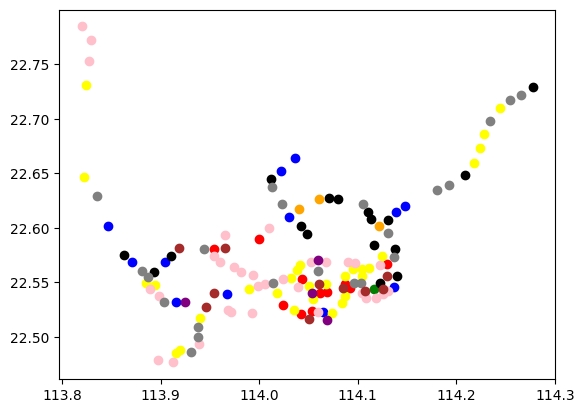

In [28]:
sumLabel = len(station_io['label'].unique())
color=['red','green','blue','yellow','black','pink','purple','orange','gray','brown']
for i in range(sumLabel):
    getKmeansRes(color[i],i)

## 将聚类结果通过进站出站数据画出来

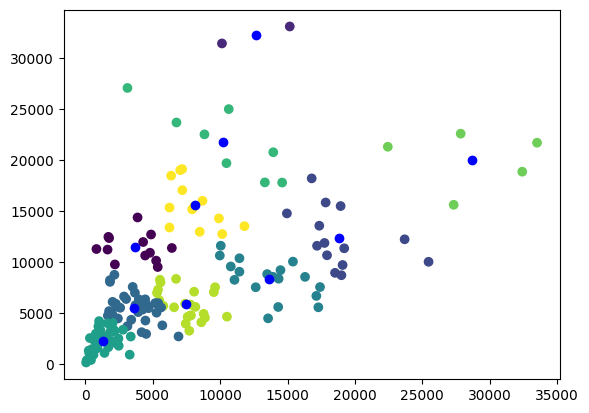

In [29]:
plt.scatter(dataio[:, 0], dataio[:, 1], c=kmeansio.labels_)
plt.scatter(kmeansio.cluster_centers_[:, 0], kmeansio.cluster_centers_[:, 1], c='blue')

## 以三维展示

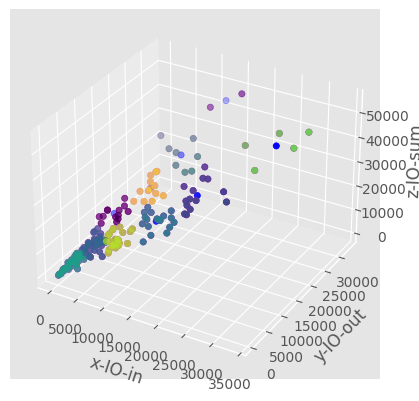

In [30]:
style.use('ggplot')
x=dataio[:, 0]
y=dataio[:, 1]
z=dataio[:, 2]
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(x, y, z, c = 'm', marker = 'o') 
# setting labels for the axes
ax1.set_xlabel('x-IO-in')
ax1.set_ylabel('y-IO-out')
ax1.set_zlabel('z-IO-sum')
# 将聚类结果画在3D图上
ax1.scatter(x, y, z, c = kmeansio.labels_, marker = 'o')
# 将聚类中心画在3D图上
ax1.scatter(kmeansio.cluster_centers_[:, 0], kmeansio.cluster_centers_[:, 1], kmeansio.cluster_centers_[:, 2], c='blue')
plt.show()